## 07 - Image Description

### Part 1 - Color descriptors

Colour can also be a good image descriptor to allow comparing images based on their content. Histogram-based methods are often employed for this type of task


In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# carregar e exibir imagens da "base de dados"
img1 = imageio.imread("dados/cebolinha3.jpg")
img2 = imageio.imread("dados/cebolinha2.jpg")

# carregar imagem de consulta e codificar funcao de distancia
# computar as distancias e exibir
imgQ = imageio.imread("dados/cebolinha1.jpg")

def Euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dQ1 = Euclidean_distance(imgQ, img1)
dQ2 = Euclidean_distance(imgQ, img2)

plt.figure(figsize=(9,3))
plt.subplot(131); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(132); plt.imshow(img1); plt.title('Rank 1 : %.1f' % dQ1)
plt.subplot(133); plt.imshow(img2); plt.title('Rank 2 : %.1f' % dQ2)

In [ ]:
def histograma_global(img, bins):

    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    # mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

In [ ]:
HQ = histograma_global(imgQ, 64)
H1 = histograma_global(img1, 64)
H2 = histograma_global(img2, 64)

dQ1_H = Euclidean_distance(HQ, H1)
dQ2_H = Euclidean_distance(HQ, H2)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(132); plt.imshow(img2); plt.title('Rank 1: %.4f' % dQ2_H)
plt.subplot(133); plt.imshow(img1); plt.title('Rank 2: %.4f' % dQ1_H)

In [ ]:
print("Dimensionalidade pixels = ", np.product(imgQ.shape))
print("Dimensionalidade histograma = ", np.product(HQ.shape))

In [ ]:
img3 = imageio.imread("dados/magali.jpg")
print("Dimensionalidade pixels = ", np.product(img3.shape))

dQ3 = Euclidean_distance(imgQ, img3)


In [ ]:
H3 = histograma_global(img3, 64)
dQ3_H = Euclidean_distance(HQ, H3)

plt.figure(figsize=(12,8))
plt.subplot(231); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(234); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(235); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(236); plt.imshow(img1); plt.title('Rank 2 : %.4f' % dQ1_H)

### Distance functions
In addition to defining a method for extracting a feature vector, it is important to define distance functions that operate on those vectors. Formally we want a function $d:R^m \rightarrow R^1$.

The Euclidean distance, or l-2 norm distance is the most widely used. Considering a pair of vectors $q$ and $p$ with $m$ dimensions each, it can be computed as follows

$\frac{1}{m} \sum_{i} (q_i - p_i)^2$ 

In [5]:
def Euclidean_distance(p, q):
    dist = np.sum(np.square(p-q))/float(p.shape[0])
    return dist

In [6]:
print("Distance 1-2 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_2)))
print("Distance 1-3 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_3)))
print("Distance 2-3 = %.3f" % (Euclidean_distance(rgbh_2, rgbh_3)))

Distance 1-2 = 2002988.979
Distance 1-3 = 2815993.846
Distance 2-3 = 5365441.953


Comparing the distances we note that indeed the images 1 and 2 are closer when compared to the distances between 1 and 3 and 2 and 3.

However, one problem is the high dimensionality of the features space, with $m=768$. One way to reduce would be to quantise the histograms into less bins, e.g. 16 bins each.

In [7]:
rgbh_1 = RGB_histogram(img1, 16)
rgbh_2 = RGB_histogram(img2, 16)
rgbh_3 = RGB_histogram(img3, 16)

print("Feature vector size = %d " % (rgbh_1.shape[0]))
print("Distance 1-2 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_2)))
print("Distance 1-3 = %.3f" % (Euclidean_distance(rgbh_1, rgbh_3)))
print("Distance 2-3 = %.3f" % (Euclidean_distance(rgbh_2, rgbh_3)))



Feature vector size = 48 
Distance 1-2 = 77641832.708
Distance 1-3 = 401180670.000
Distance 2-3 = 410731835.375


Another approach is to obtain a single channel from the RGB image, combining the colour channels using a RGB to grayscale conversion. There are many methods, such as Intensity, Luminance, Luma and other. Let us use the Luminance, which is a weighted averabe of the colour channels.

In [8]:
def normalize_minmax(f, factor):
    f_min = np.min(f)
    f_max = np.max(f)
    f = (f - f_min)/(f_max-f_min)
    return (f*factor)


def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = normalize_minmax(new_img, 255)
    
    return new_img

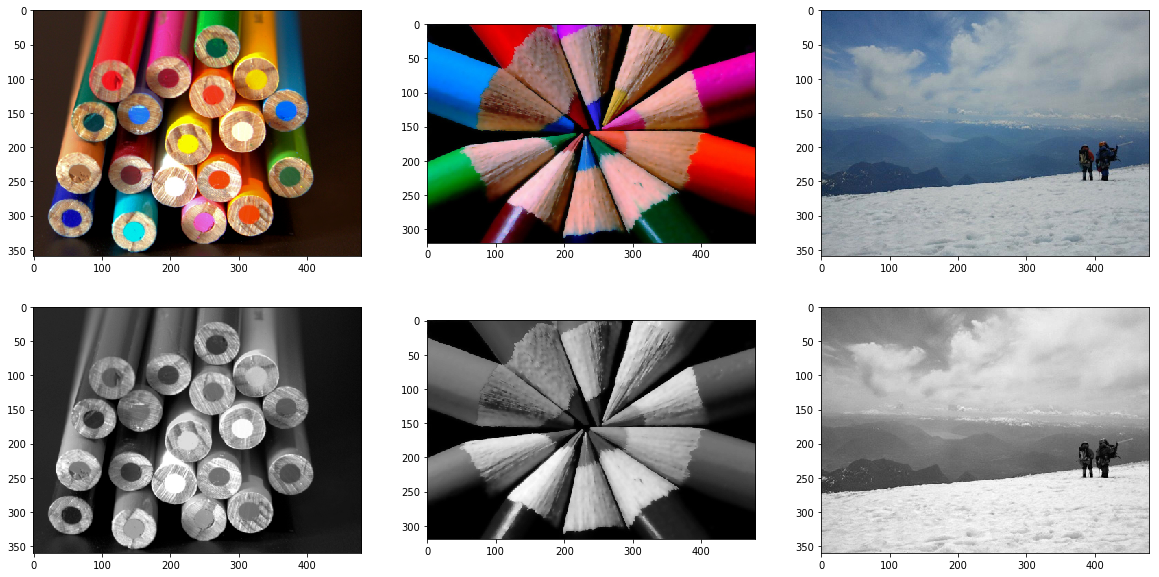

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(231); plt.imshow(img1)
plt.subplot(232); plt.imshow(img2)
plt.subplot(233); plt.imshow(img3)
plt.subplot(234); plt.imshow(Luminance(img1), cmap="gray")
plt.subplot(235); plt.imshow(Luminance(img2), cmap="gray")
plt.subplot(236); plt.imshow(Luminance(img3), cmap="gray")

plt.show()

In [10]:
def grayscale_histogram(img, bins):
    hist,_ = np.histogram(img, bins=bins, range=(0,255))
    return hist

In [11]:
gh_1 = grayscale_histogram(img1, 48)
gh_2 = grayscale_histogram(img2, 48)
gh_3 = grayscale_histogram(img3, 48)

print("Feature vector size = %d " % (gh_1.shape[0]))
print("Distance 1-2 = %.3f" % (Euclidean_distance(gh_1, gh_2)))
print("Distance 1-3 = %.3f" % (Euclidean_distance(gh_1, gh_3)))
print("Distance 2-3 = %.3f" % (Euclidean_distance(gh_2, gh_3)))

Feature vector size = 48 
Distance 1-2 = 170703265.625
Distance 1-3 = 409857449.542
Distance 2-3 = 668122829.750


Therefore, even after projecting the RGB colour space into a single-channel space, it is possible to obtain a fair comparison between the images. 

However, we used images that are easy to discriminate. More complex cases would require methods that are able to capture other attributes in terms of colour, such as considering the regions the colour appears: flat regions, texture regions, borders, and not only the frequency of colours as demonstrated.

Alternative distance functions are also important to consider. For colour features spaces, the logarithm function may be useful to decrease the influence of background colours in the sum, and output smaller numbers.



In [14]:
def Log_Euclidean_distance(p, q):
    pl = np.log2(p.astype(float)+1)
    ql = np.log2(q.astype(float)+1)
    
    dist = np.sum(np.square(pl-ql))/float(pl.shape[0])
    return dist

In [15]:
print("Log Euclidean distances")
print("Distance 1-2 = %.3f" % (Log_Euclidean_distance(gh_1, gh_2)))
print("Distance 1-3 = %.3f" % (Log_Euclidean_distance(gh_1, gh_3)))
print("Distance 2-3 = %.3f" % (Log_Euclidean_distance(gh_2, gh_3)))

Log Euclidean distances
Distance 1-2 = 0.773
Distance 1-3 = 36.642
Distance 2-3 = 32.271
